In [42]:
!git clone https://github.com/andssuu/moncattle.git

Cloning into 'moncattle'...
remote: Enumerating objects: 183, done.
remote: Counting objects: 100% (183/183), done.
remote: Compressing objects: 100% (125/125), done.
remote: Total 183 (delta 71), reused 106 (delta 39), pack-reused 0
Receiving objects: 100% (183/183), 1.99 MiB | 18.50 MiB/s, done.
Resolving deltas: 100% (71/71), done.


In [43]:
import math
from datetime import datetime

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib
import matplotlib.pyplot as plt

df = pd.read_csv("moncattle/data/lomba.csv", float_precision='high')
bases = ["A2", "A3", "B2", "B3", "C3", "C4", "D1", "D2", "D3", "D4"]

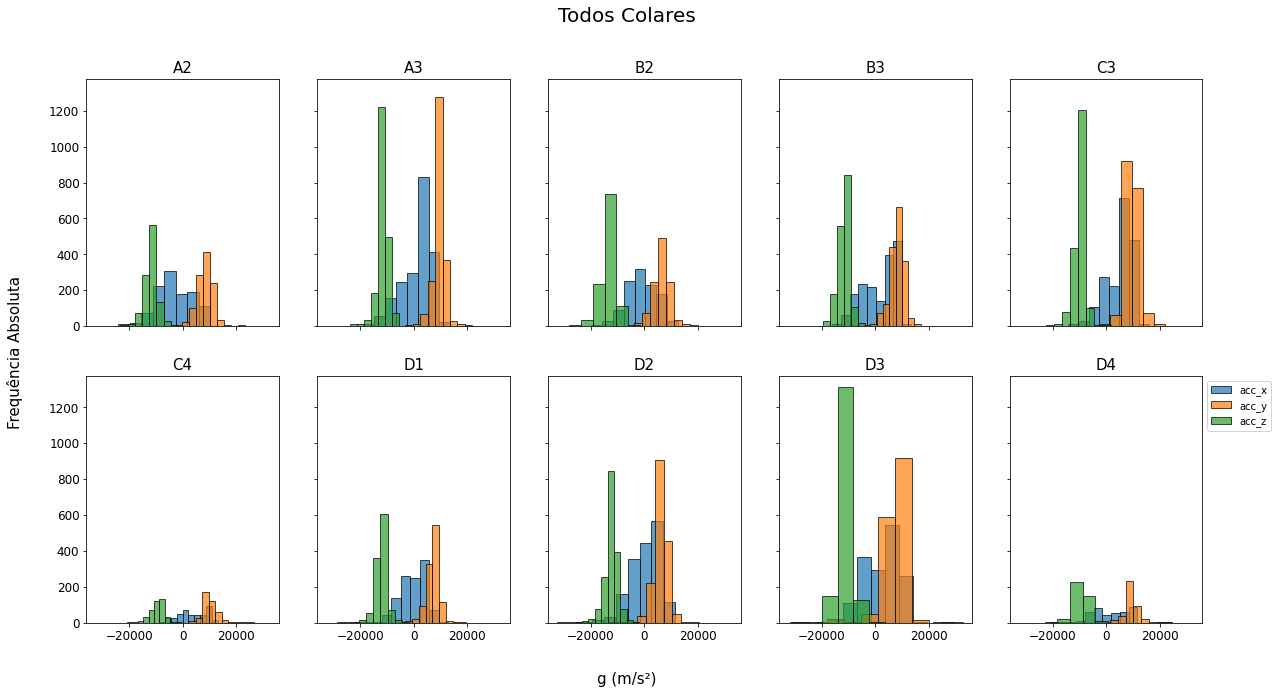

In [44]:
fig, axs = plt.subplots(2, 5, sharex=True, sharey=True, figsize=(20, 10))
fig.canvas.set_window_title('histogram accelerometer all')
fig.suptitle('Todos Colares', fontsize=20)
fig.text(0.5, 0.04, 'g (m/s²)', ha='center', fontsize=15)
fig.text(0.07, 0.5, 'Frequência Absoluta',
            va='center', rotation='vertical', fontsize=15)
[ax.tick_params(labelsize=12) for _axs in axs for ax in _axs]
for i, base in enumerate(bases):
    data = df[df.id_colar == base].iloc[:, 1:4]
    axs[int(i >= 5)][i % 5].hist(data.iloc[:, 0],
                                    edgecolor='black', alpha=0.7, label='acc_x')
    axs[int(i >= 5)][i % 5].hist(data.iloc[:, 1],
                                    edgecolor='black', alpha=0.7, label='acc_y')
    axs[int(i >= 5)][i % 5].hist(data.iloc[:, 2],
                                    edgecolor='black', alpha=0.7, label='acc_z')
    axs[int(i >= 5)][i % 5].set_title(base, fontsize=15)
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.show()

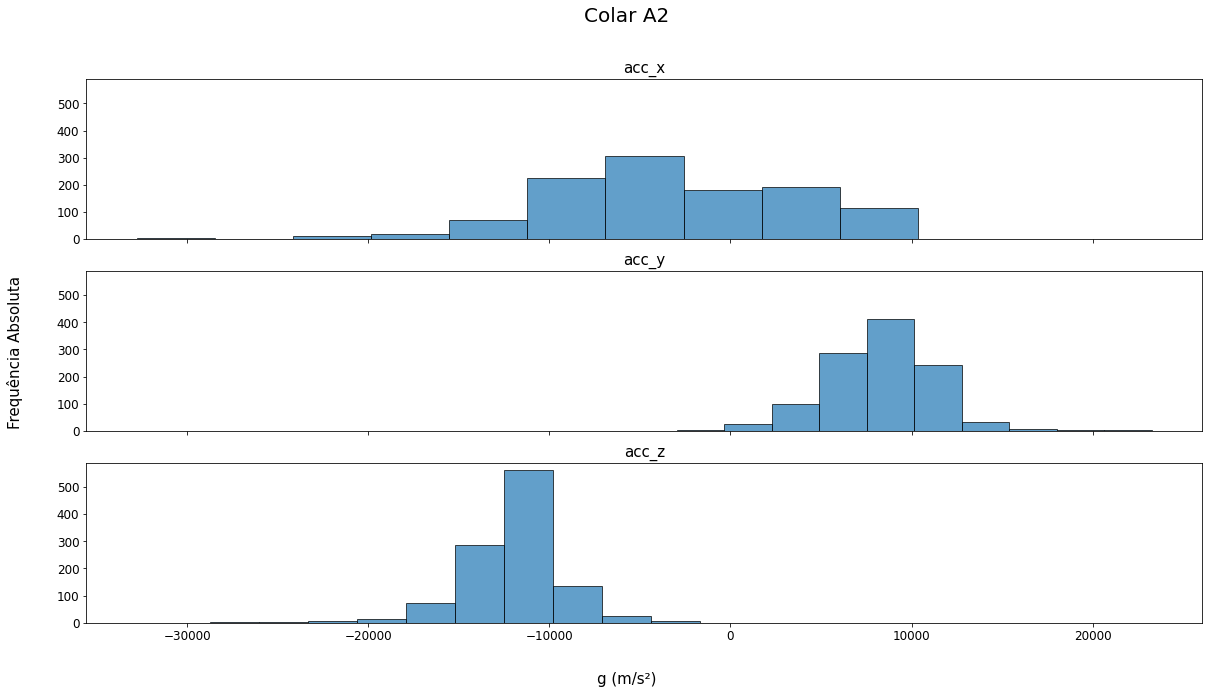

In [45]:
base = bases[0]
data = df[df.id_colar == base].iloc[:, 1:4]
fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=(20, 10))
fig.canvas.set_window_title(
    'histogram accelerometer {}'.format(base.lower()))
fig.text(0.5, 0.04, 'g (m/s²)', ha='center', fontsize=15)
fig.text(0.07, 0.5, 'Frequência Absoluta',
            va='center', rotation='vertical', fontsize=15)
[ax.hist(data.iloc[:, i], edgecolor='black', alpha=0.7)
    for i, ax in enumerate(axs)]
[ax.set_title(t, fontsize=15) for t, ax in zip(data.columns, axs)]
fig.suptitle('Colar {}'.format(base), fontsize=20)
[ax.tick_params(labelsize=12) for ax in axs]
plt.show()

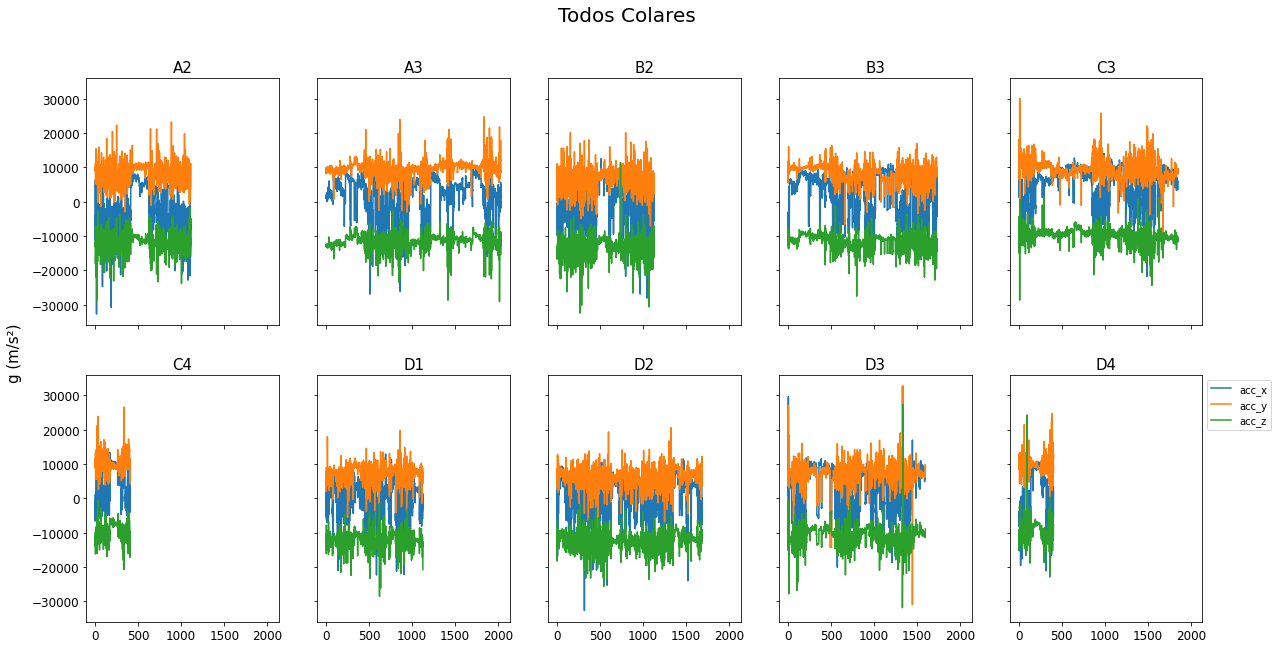

In [46]:
fig, axs = plt.subplots(2, 5, sharex=True, sharey=True, figsize=(20, 10))
fig.canvas.set_window_title('plot accelerometer all')
fig.suptitle('Todos Colares', fontsize=20)
fig.text(0.07, 0.5, 'g (m/s²)',
            va='center', rotation='vertical', fontsize=15)
[ax.tick_params(labelsize=12) for _axs in axs for ax in _axs]
for i, base in enumerate(bases):
    data = df[df.id_colar == base].iloc[:, 1:4]
    plt.title('Colar {}'.format(base), fontsize=20)
    axs[int(i >= 5)][i % 5].plot(
        range(data.shape[0]), data.iloc[:, 0], label='acc_x')
    axs[int(i >= 5)][i % 5].plot(
        range(data.shape[0]), data.iloc[:, 1], label='acc_y')
    axs[int(i >= 5)][i % 5].plot(
        range(data.shape[0]), data.iloc[:, 2], label='acc_z')
    axs[int(i >= 5)][i % 5].set_title(base, fontsize=15)
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.show()

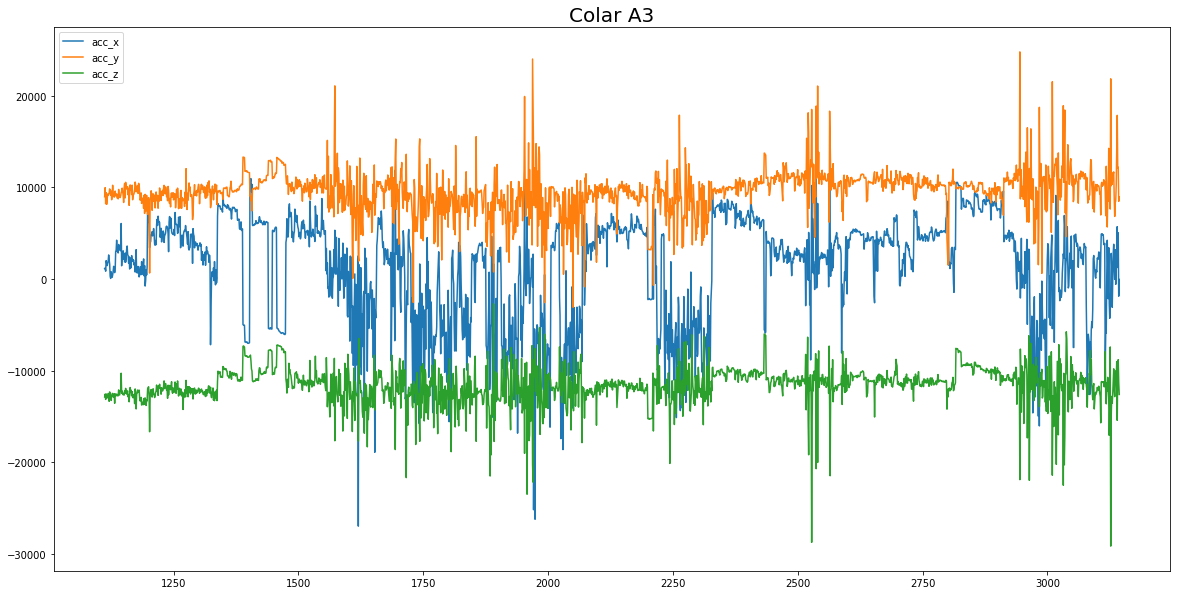

In [47]:
base = bases[1]
data = df[df.id_colar == base].iloc[:, 1:4]
labels = df[df.id_colar == base].iloc[:, -1]
hours = df[df.id_colar == base].loc[:, "horario"]
dates = df[df.id_colar == base].loc[:, "data"]
_dates = [datetime.strptime('{}:{}'.format(_d, _h), '%d%m%y:%H%M%S.%f')
            for _d, _h in zip(dates, hours)]
LE = LabelEncoder()
encode_labels = LE.fit_transform(labels)
axs = data.plot(figsize=(20, 10))
plt.title('Colar {}'.format(base), fontsize=20)
axs.figure.canvas.set_window_title(
    'plot accelerometer {}'.format(base.lower()))
plt.legend(loc="best")
plt.show()

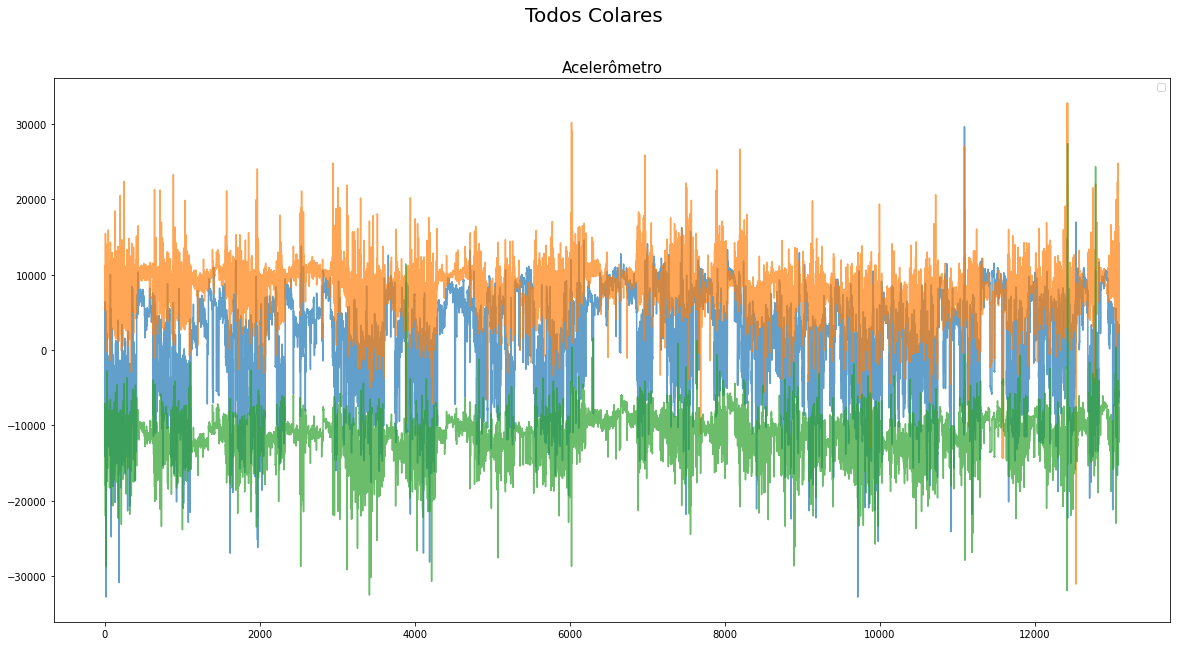

In [48]:
fig, axs = plt.subplots(1, sharex=True, sharey=True, figsize=(20, 10))
fig.canvas.set_window_title('series all')
fig.suptitle('Todos Colares', fontsize=20)
fig.text(0.07, 0.5, '',
            va='center', rotation='vertical', fontsize=15)
axs.set_title('Acelerômetro', fontsize=15)
axs.plot(df.iloc[:, 1:4], alpha=0.7)
plt.legend(iter(_), ('x', 'y', 'z'))
plt.show()